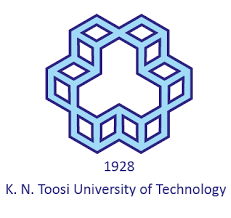
# ***RS Lab***

KNTU G.E engineering faculty _ 2023 June


Hasti Rafiei Nia : 9926683

Real image.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

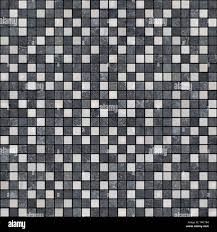

In [ ]:
img = cv2.imread('image.jpg')
cv2_imshow(img)


# **Histogram Equalization**

Without using built-in function :

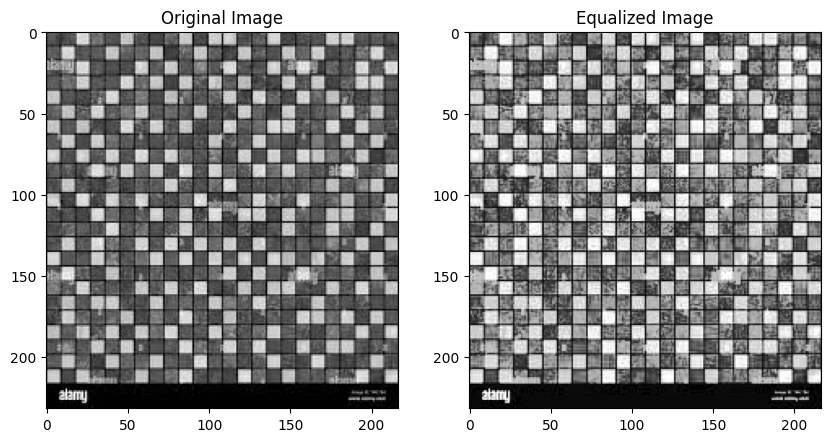

In [ ]:
def histeq(img):
    # Compute histogram
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
    
    # Compute cumulative distribution function
    cdf = hist.cumsum()
    
    # Normalize cdf
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    # Compute new pixel values using cdf
    img_eq = np.interp(img.flatten(), bins[:-1], cdf_normalized).reshape(img.shape)
    
    return img_eq

# Load image
img = plt.imread("image.jpg")

# Convert to grayscale
img_gray = np.mean(img, axis=2)

# Perform histogram equalization
img_eq = histeq(img_gray)

# Display results
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_gray, cmap="gray")
axs[0].set_title("Original Image")
axs[1].imshow(img_eq, cmap="gray")
axs[1].set_title("Equalized Image")
plt.show()

Using built-in function :

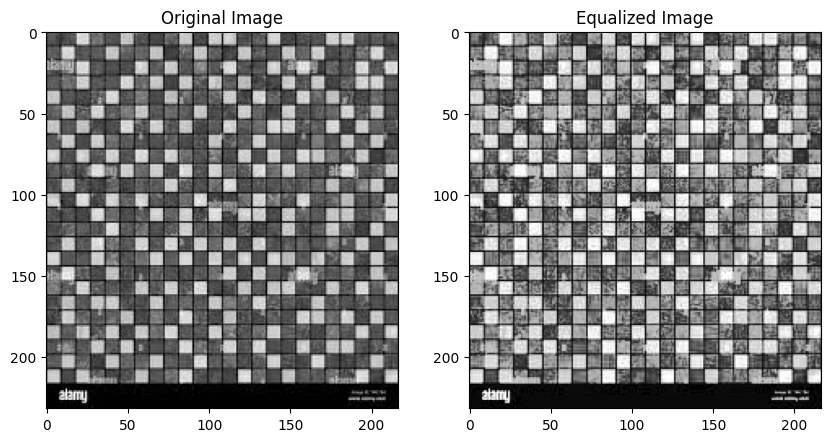

In [ ]:
# Load the image
img = cv2.imread('image.jpg', 0)

# Equalize the histogram
eq_img = cv2.equalizeHist(img)

# Display the original and equalized images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_gray, cmap="gray")
axs[0].set_title("Original Image")
axs[1].imshow(img_eq, cmap="gray")
axs[1].set_title("Equalized Image")
plt.show()

***Gaussian Filter***

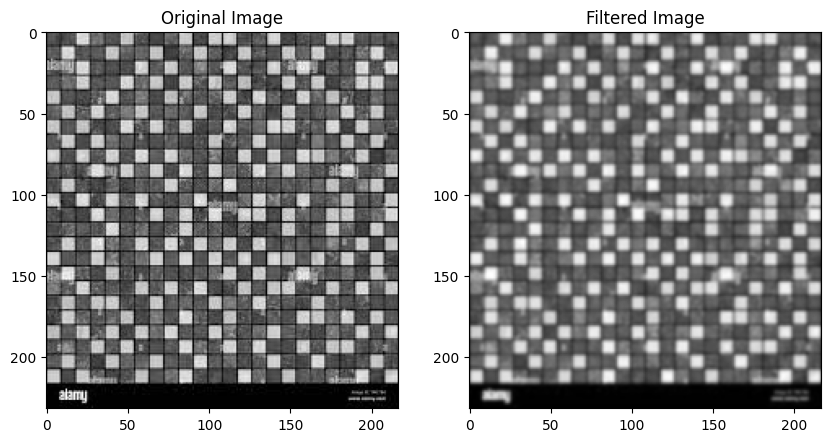

In [ ]:
def gaussian_kernel(size, sigma):
    kernel = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            kernel[i, j] = np.exp(-(x**2 + y**2)/(2*sigma**2))
    return kernel/np.sum(kernel)

def gaussian_filter(image, kernel_size, sigma):
    padded_image = np.pad(image, kernel_size//2, 'constant')
    kernel = gaussian_kernel(kernel_size, sigma)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            filtered_image[i, j] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size]*kernel)
    return filtered_image

# Load the image
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian filter
filtered_image = gaussian_filter(image, kernel_size=5, sigma=1)

# Display the original and filtered images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_gray, cmap="gray")
axs[0].set_title("Original Image")
axs[1].imshow(filtered_image, cmap="gray")
axs[1].set_title("Filtered Image")
plt.show()

With built-in function : 

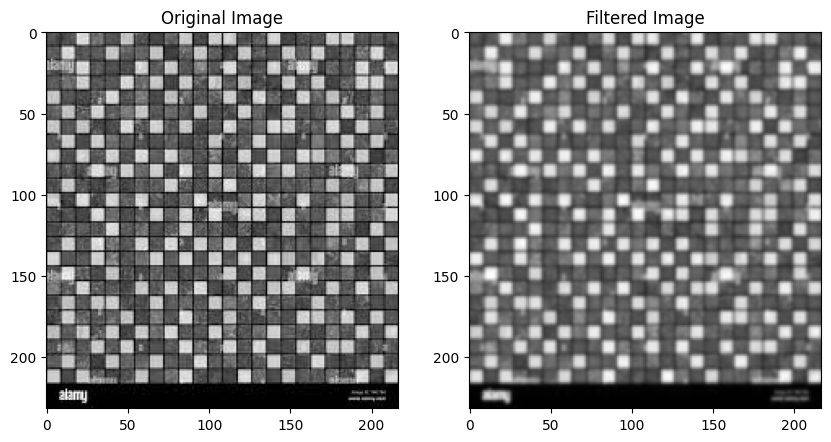

In [ ]:
# Load the image
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian filter
filtered_image = cv2.GaussianBlur(image, ksize=(5, 5), sigmaX=1)

# Display the original and filtered images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_gray, cmap="gray")
axs[0].set_title("Original Image")
axs[1].imshow(filtered_image, cmap="gray")
axs[1].set_title("Filtered Image")
plt.show()

***Median Filter***

Without using built-in function : 

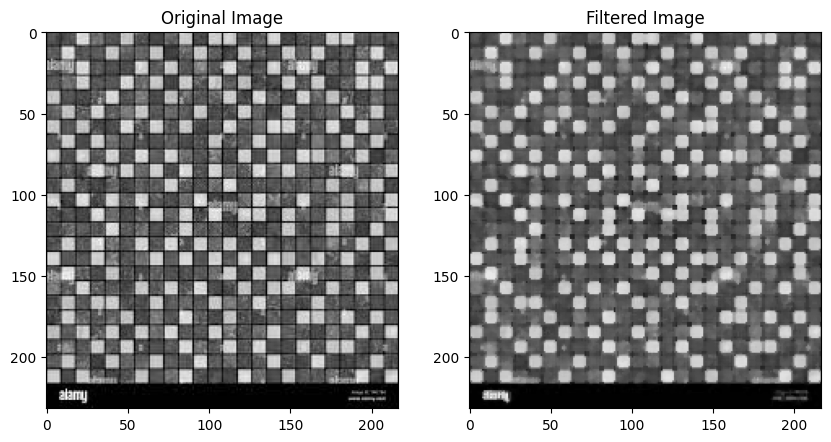

In [ ]:
# Load the image
img = cv2.imread('image.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the filter size
filter_size = 3

# Pad the image with zeros
padded = np.pad(gray, (filter_size//2, filter_size//2), mode='constant')

# Create an empty array for the filtered image
filtered = np.zeros_like(gray)

# Apply the filter
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        window = padded[i:i+filter_size, j:j+filter_size]
        median = np.median(window)
        filtered[i, j] = median

# Display the results
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_gray, cmap="gray")
axs[0].set_title("Original Image")
axs[1].imshow(filtered , cmap="gray")
axs[1].set_title("Filtered Image")
plt.show()

Using built-in function : 

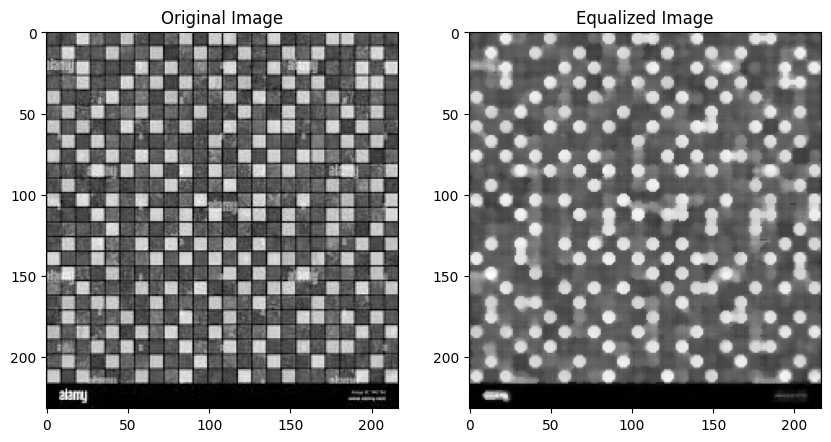

In [ ]:
# Load the image
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply median filter
filtered_image = cv2.medianBlur(image, ksize=5)

# Display the original and filtered images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_gray, cmap="gray")
axs[0].set_title("Original Image")
axs[1].imshow(filtered_image, cmap="gray")
axs[1].set_title("Equalized Image")
plt.show()

***Bilateral Filter***

Without using built-in functions :

<ipython-input-16-37a022f20779>:18: RuntimeWarning: overflow encountered in ubyte_scalars
  intensity_distance = np.abs(padded_image[x, y] - padded_image[i, j])


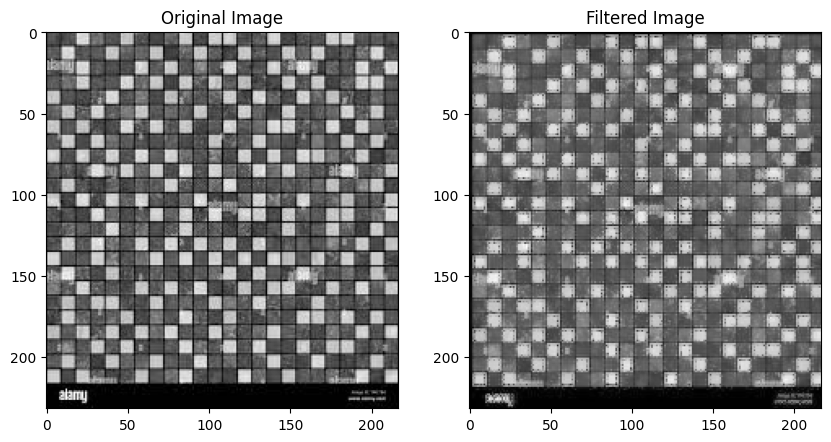

In [ ]:
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def bilateral_filter(image, kernel_size, sigma_space, sigma_range):
    padded_image = np.pad(image, kernel_size//2, 'constant')
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            total_weight = 0
            weighted_sum = 0
            for k in range(kernel_size):
                for l in range(kernel_size):
                    x = i + k - kernel_size//2
                    y = j + l - kernel_size//2
                    if x < 0 or x >= image.shape[0] or y < 0 or y >= image.shape[1]:
                        continue
                    spatial_distance = distance(i, j, x, y)
                    intensity_distance = np.abs(padded_image[x, y] - padded_image[i, j])
                    weight = np.exp(-(spatial_distance**2)/(2*sigma_space**2) 
                                    - (intensity_distance**2)/(2*sigma_range**2))
                    weighted_sum += padded_image[x, y]*weight
                    total_weight += weight
            filtered_image[i, j] = weighted_sum/total_weight
    return filtered_image
# Load the image
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
# Apply Bilateral filter
filtered_image = bilateral_filter(image, kernel_size=5, sigma_space=50, sigma_range=50)

# Display the original and filtered images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_gray, cmap="gray")
axs[0].set_title("Original Image")
axs[1].imshow(filtered_image, cmap="gray")
axs[1].set_title("Filtered Image")
plt.show()


Using built-in functions :

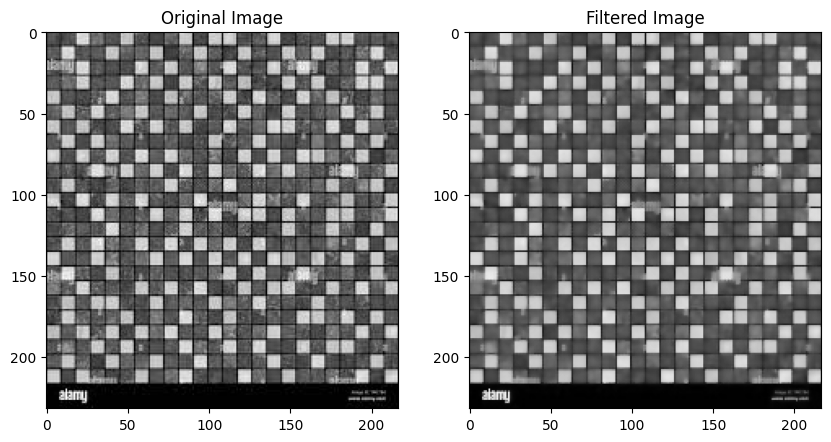

In [ ]:
# Load the image
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Bilateral filter
filtered_image = cv2.bilateralFilter(image, d=5, sigmaColor=50, sigmaSpace=50)

# Display the original and filtered image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_gray, cmap="gray")
axs[0].set_title("Original Image")
axs[1].imshow(filtered_image, cmap="gray")
axs[1].set_title("Filtered Image")
plt.show()